In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot
from warnings import filterwarnings

filterwarnings("ignore")

In [2]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df = pd.DataFrame(data)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### meaning of classifications

- Education:
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

- EnvironmentSatisfaction:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- JobSatisfaction:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- PerformanceRating:
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

- RelationshipSatisfaction:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- WorkLifeBalance:
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#254E58;overflow:hidden"><b> Data Discovery </b></div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df1 = df.select_dtypes('object')
df1

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [6]:
df2 = df.select_dtypes('int64')
df2

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [7]:
df1.describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
#check for NaN values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

In [11]:
# remove 4 columns
df = df.drop(['Over18', 'EmployeeNumber','EmployeeCount','StandardHours'],axis=1)

In [12]:
# to separate categorical and numerical columns
cat = df.select_dtypes(['object']).columns
num = df.select_dtypes(['number']).columns
print(cat)
print(num)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [13]:
for i in cat:
    print('Unique values of ', i, set(df[i]))

Unique values of  Attrition {'Yes', 'No'}
Unique values of  BusinessTravel {'Travel_Rarely', 'Travel_Frequently', 'Non-Travel'}
Unique values of  Department {'Human Resources', 'Sales', 'Research & Development'}
Unique values of  EducationField {'Other', 'Medical', 'Technical Degree', 'Life Sciences', 'Marketing', 'Human Resources'}
Unique values of  Gender {'Male', 'Female'}
Unique values of  JobRole {'Sales Executive', 'Laboratory Technician', 'Sales Representative', 'Manufacturing Director', 'Manager', 'Healthcare Representative', 'Research Director', 'Human Resources', 'Research Scientist'}
Unique values of  MaritalStatus {'Divorced', 'Single', 'Married'}
Unique values of  OverTime {'Yes', 'No'}


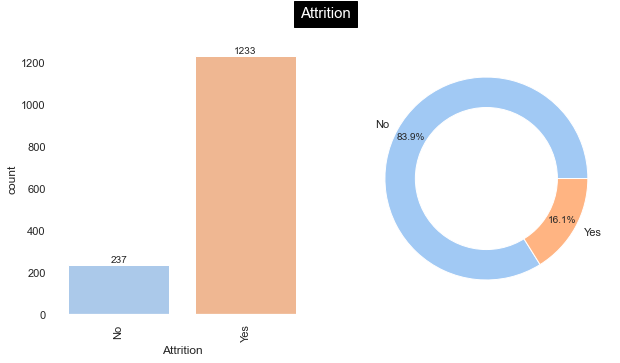

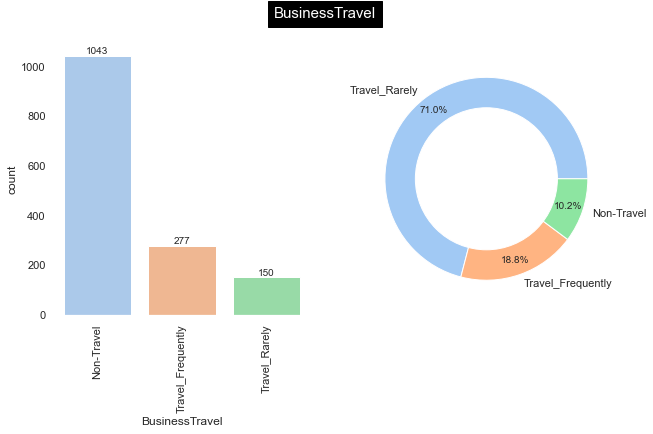

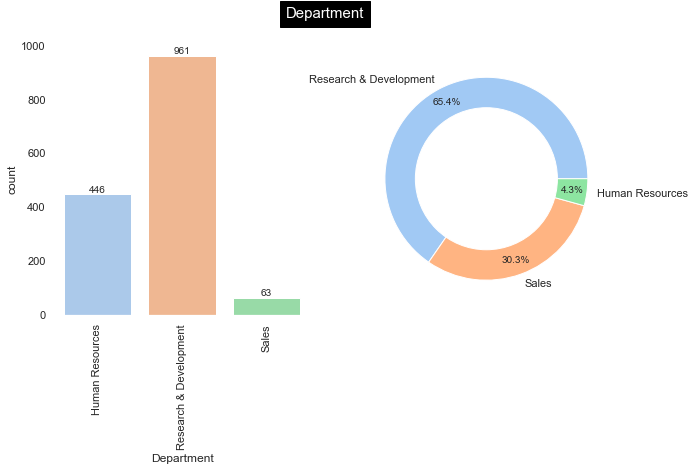

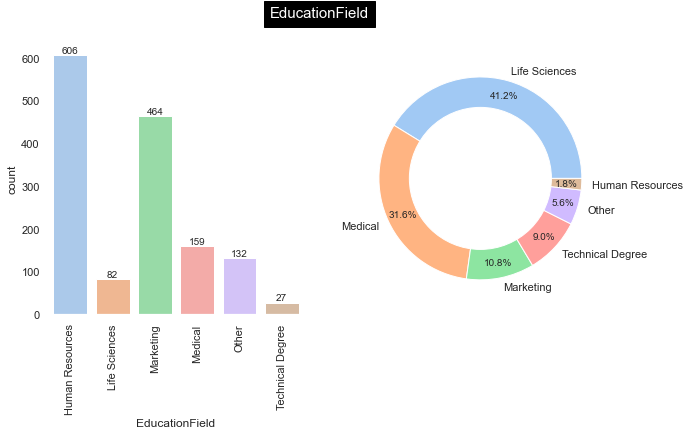

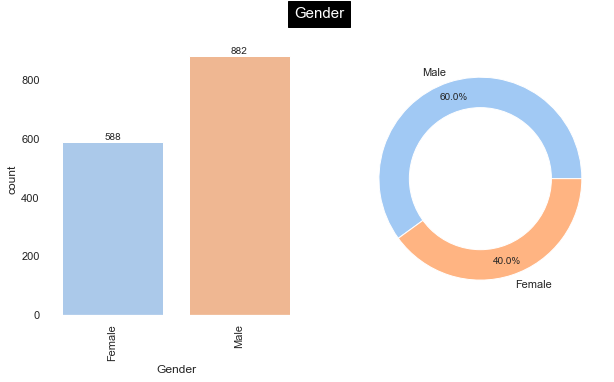

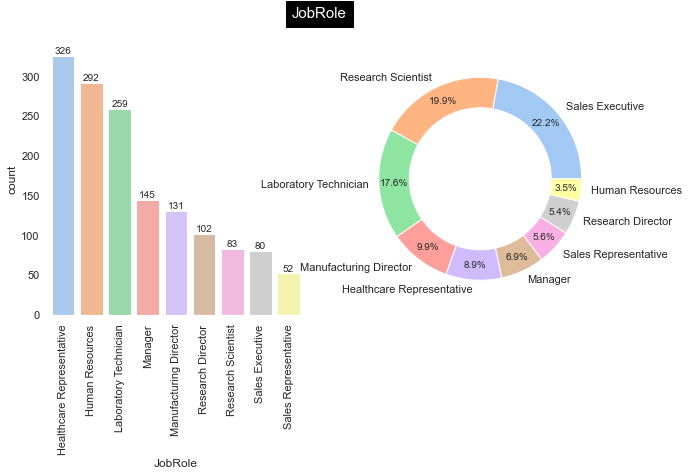

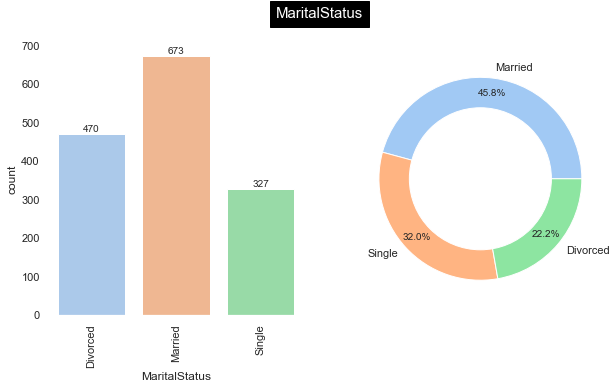

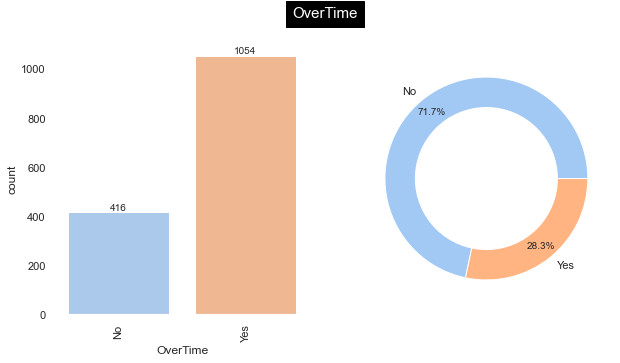

In [14]:
# univariate analysis of categorical data:
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"#9ed9cd"})
sns.set_palette("pastel")
for i, col in enumerate(cat):

    fig, axes = plt.subplots(1,2,figsize=(10,5))

    # count of col (countplot)

    ax=sns.countplot(data=df, x=col, ax=axes[0])
    activities = [var for var in df[col].value_counts().sort_index().index]
    ax.set_xticklabels(activities,rotation=90)
    for container in axes[0].containers:
        axes[0].bar_label(container)

    #count of col (pie chart)

    index = df[col].value_counts().index
    size = df[col].value_counts().values
    explode = (0.05, 0.05)

    axes[1].pie(size, labels=index,autopct='%1.1f%%', pctdistance=0.85)

    # Inner circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.suptitle(col,backgroundcolor='black',color='white',fontsize=15)

    plt.show()


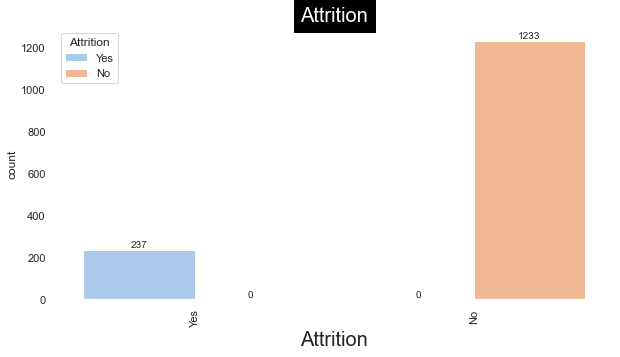

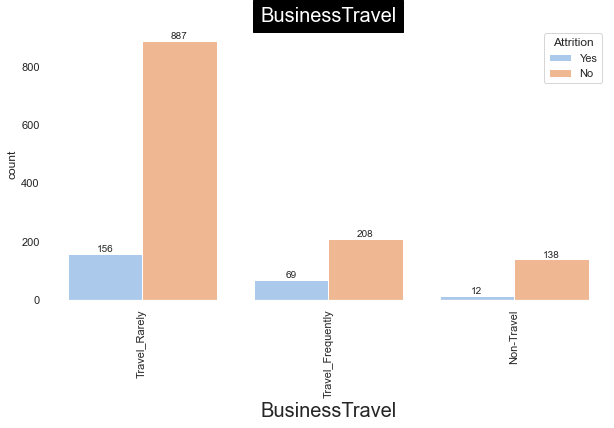

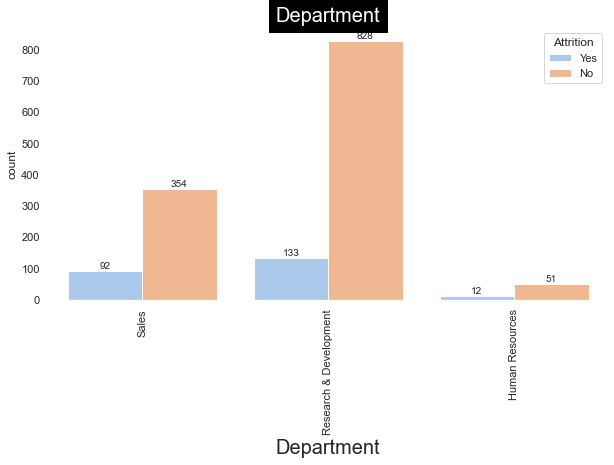

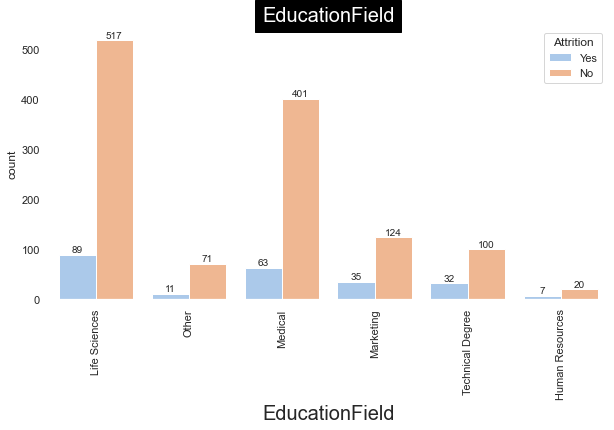

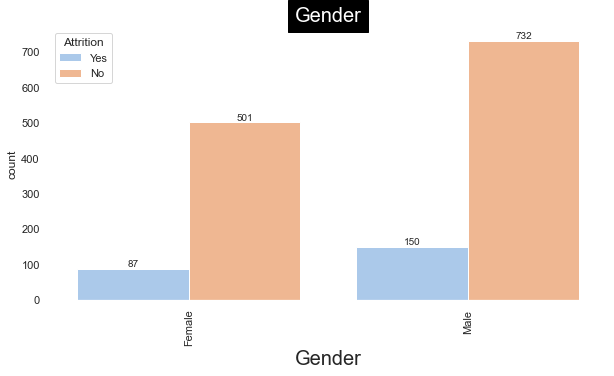

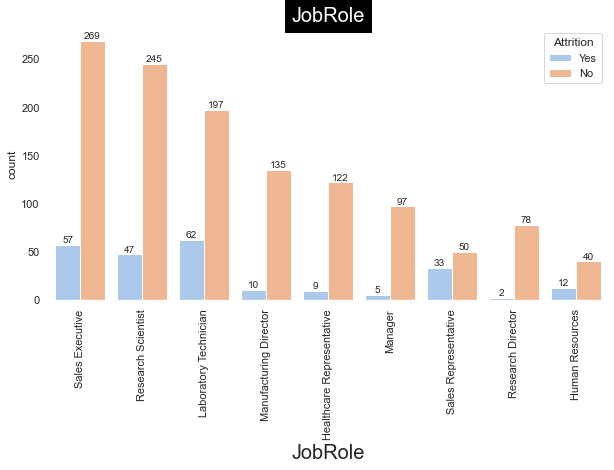

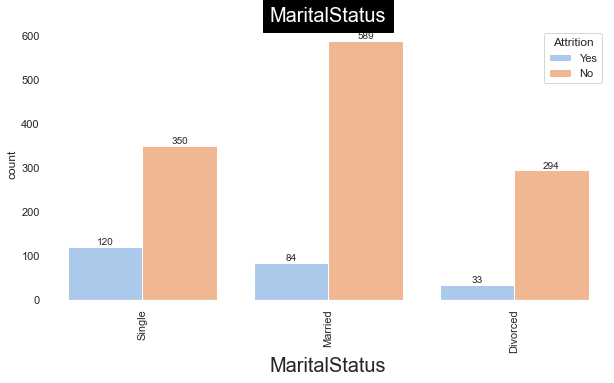

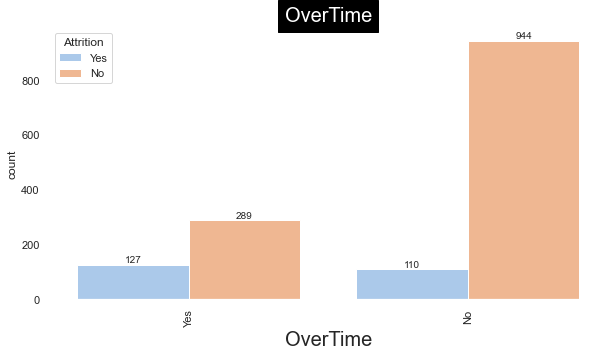

In [15]:
for column in cat :
    plt.figure(figsize=(10,5))

    ax=sns.countplot(x=df[column], data=df,hue="Attrition")
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(column,backgroundcolor='black',color='white',fontsize=20)
    plt.xticks(rotation=90)
    plt.xlabel(column,fontsize=20)
    plt.grid()
    plt.show()

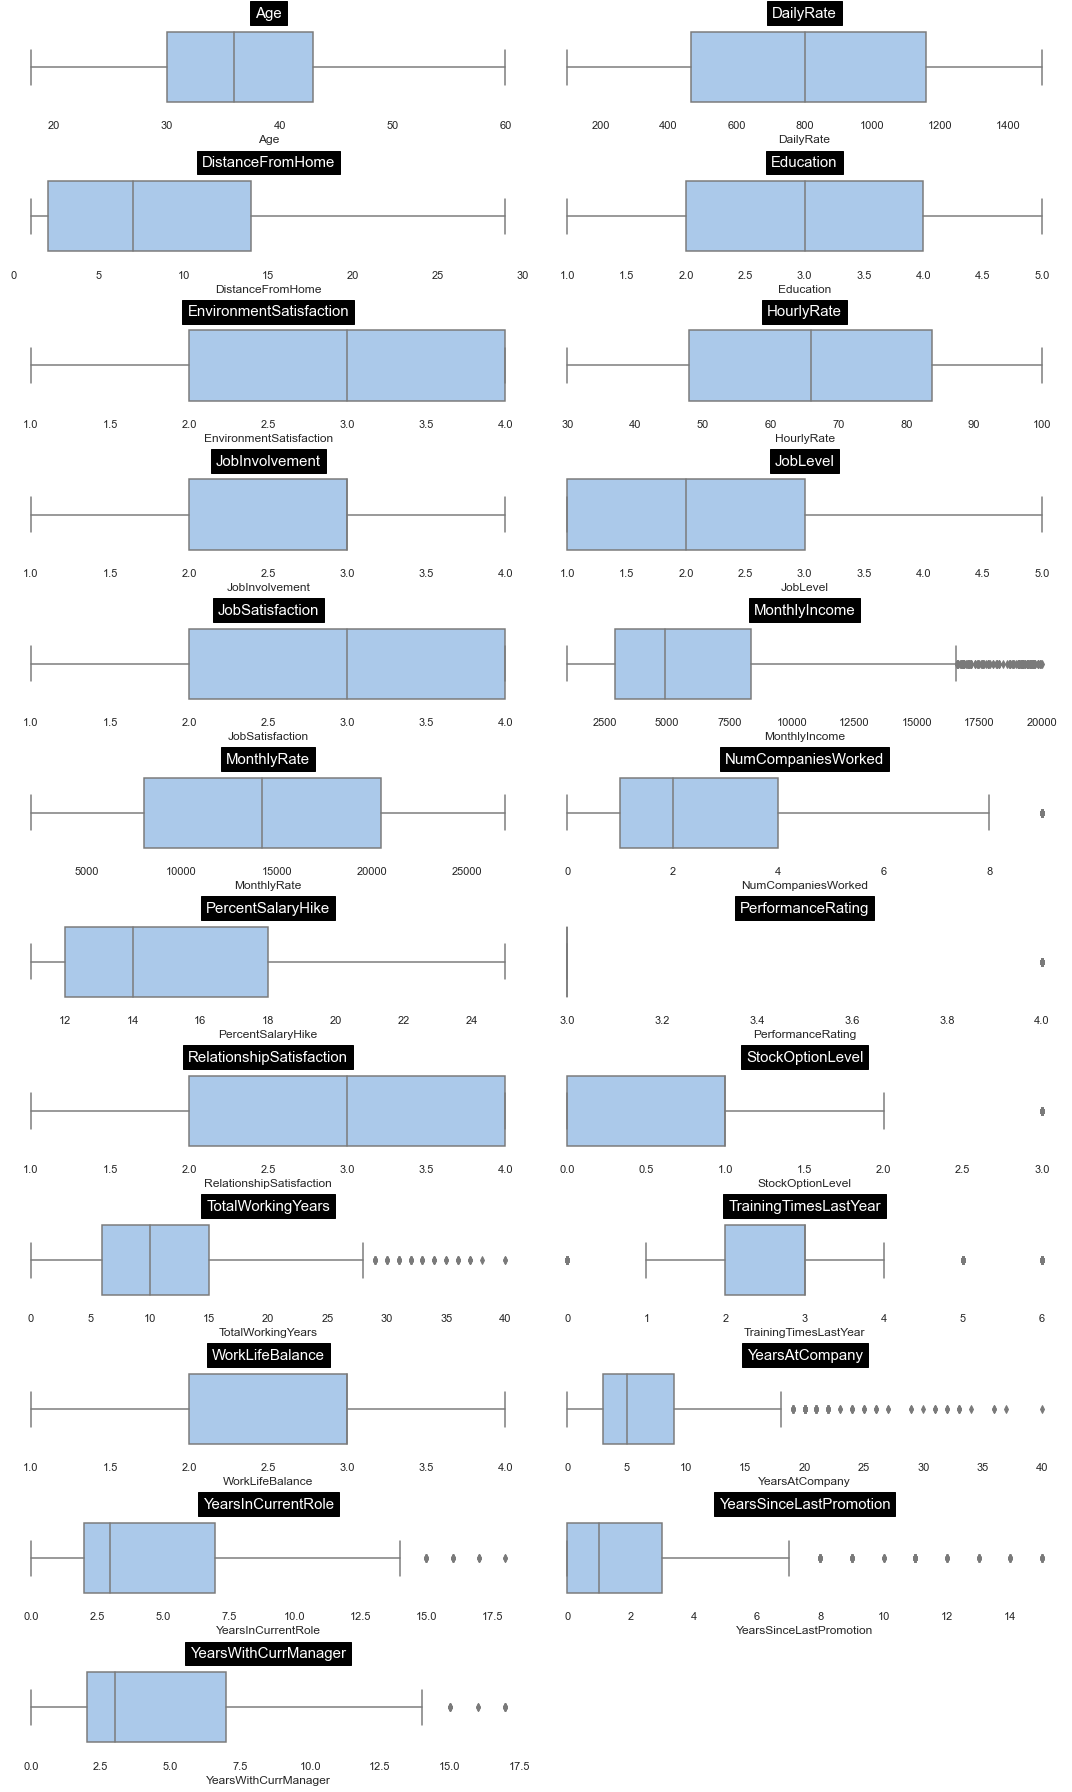

In [16]:
plt.figure(figsize = (15,25))
for idx, i in enumerate(num):
    plt.subplot(12, 2, idx + 1)
    sns.boxplot(x = i, data = df)
    plt.title(i,backgroundcolor='black',color='white',fontsize=15)
    plt.xlabel(i, size = 12)
plt.tight_layout()
plt.show()

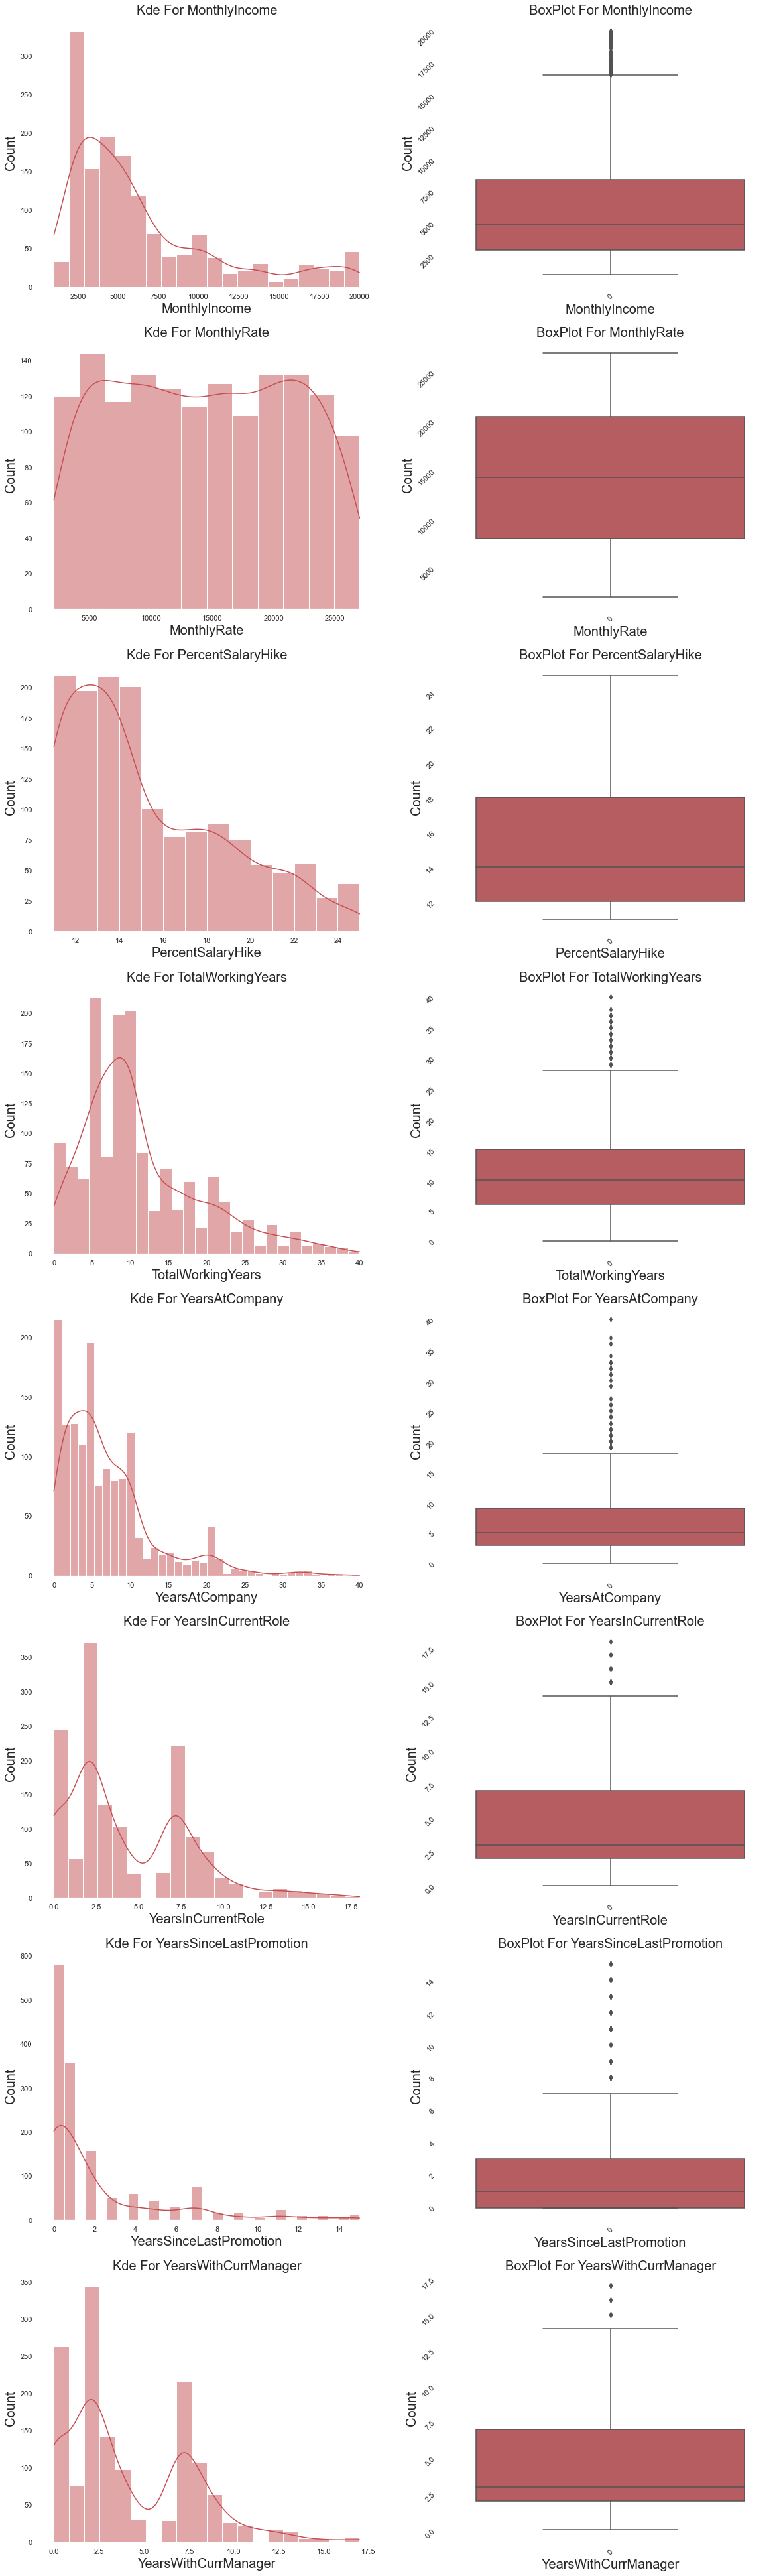

In [17]:
li=['MonthlyIncome','MonthlyRate', 'PercentSalaryHike',
    'TotalWorkingYears','YearsAtCompany', 'YearsInCurrentRole',
   'YearsSinceLastPromotion', 'YearsWithCurrManager']
plt.figure(figsize=(20,70))
i=1
for x in li:
    plt.subplot(len(li),2,i)
    sns.histplot(data[x],kde=True,color='r')
    plt.grid(True)
    plt.title(f'Kde For {x}',fontsize=20)
    plt.xlabel(f'{x}',fontsize=20)
    plt.ylabel('Count',fontsize=20)
    i+=1
    plt.subplot(len(li),2,i)
    sns.boxplot(data=data[x],color='r')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.title(f'BoxPlot For {x}',fontsize=20)
    plt.xlabel(f'{x}',fontsize=20)
    plt.ylabel('Count',fontsize=20)
    i+=1

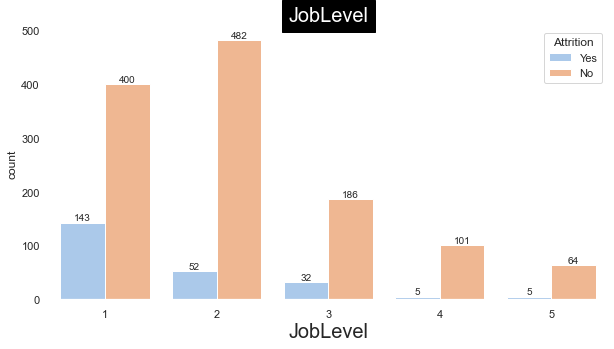

In [18]:
plt.figure(figsize=(10,5))

ax = sns.countplot(x=df['JobLevel'], data=df,hue="Attrition")
for container in ax.containers:
        ax.bar_label(container)
plt.title('JobLevel',backgroundcolor='black',color='white',fontsize=20)
plt.xlabel('JobLevel',fontsize=20)
plt.grid()
plt.show()

<Figure size 360x720 with 0 Axes>

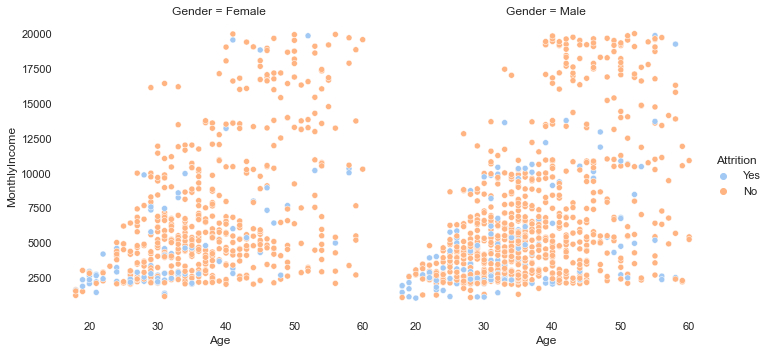

In [19]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Age", hue="Attrition",col='Gender')
plt.show()

<Figure size 360x720 with 0 Axes>

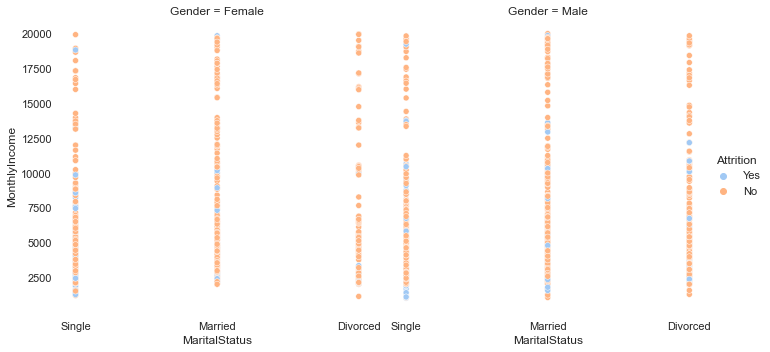

In [20]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="MaritalStatus", hue="Attrition",col='Gender')
plt.show()

<Figure size 360x720 with 0 Axes>

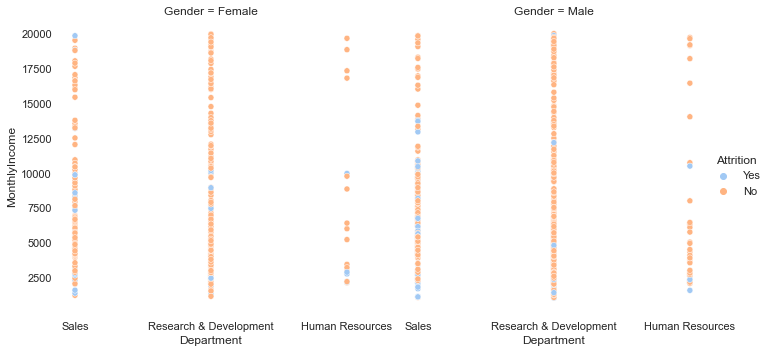

In [21]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Department", hue="Attrition",col='Gender')
plt.show()

<Figure size 360x720 with 0 Axes>

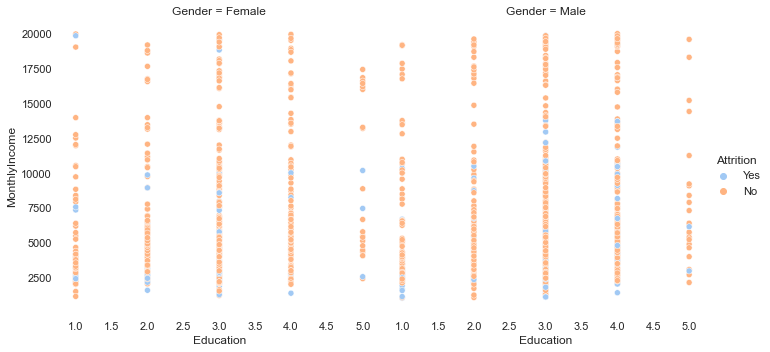

In [22]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Education", hue="Attrition",col='Gender')
plt.show()

<Figure size 360x720 with 0 Axes>

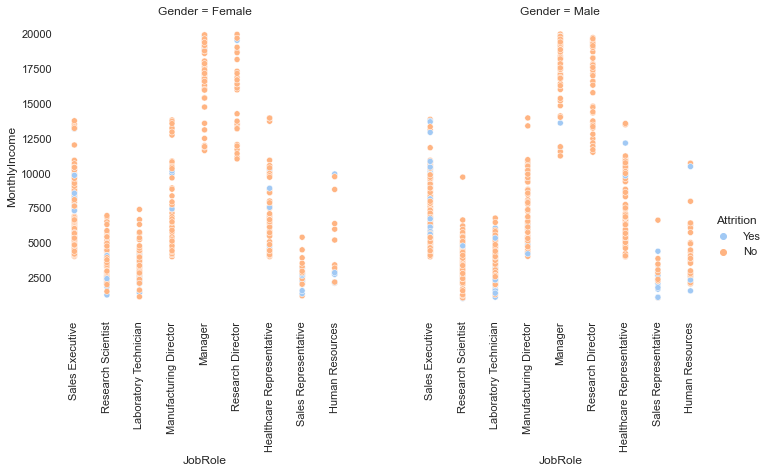

In [23]:
plt.figure(figsize=(5,10))
ax=sns.relplot(data=df, y="MonthlyIncome", x="JobRole", hue="Attrition",col='Gender')
rotation = 90
for i, ax in enumerate(ax.fig.axes):   ## getting all axes of the fig object
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)
#plt.xticks(rotation=90)
plt.show()

<Figure size 360x720 with 0 Axes>

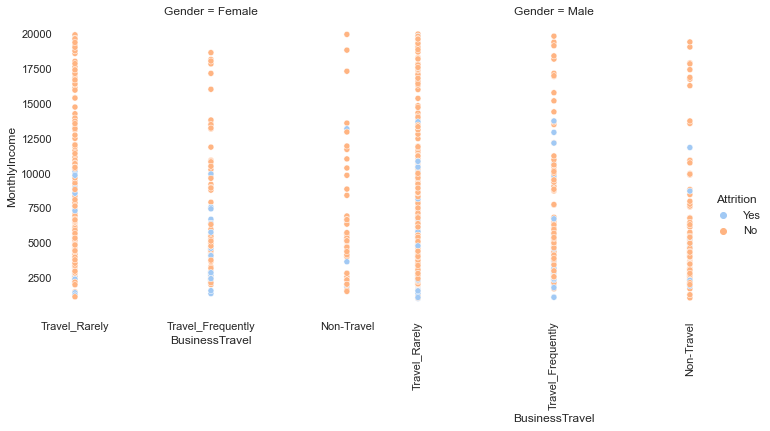

In [24]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="BusinessTravel", hue="Attrition",col='Gender')
plt.xticks(rotation=90)
plt.show()

# 💡 Analysis of graphs
    
- Attrition is the highest for both men and women from 18 to 35 years of age and gradually decreases.
- As income increases, attrition decreases.
- Attrition is much, much less in divorced women.
- Attrition is higher for employees who usually travel than others, and this rate is higher for women than for men.
- Attrition is the highest for those in level 1 jobs.
- Women with the job position of manager, research director and technician laboratory have almost no attrition.
- Men with the position of sales expert have a lot of attrition.

In [25]:
df_copy = df.copy()

In [26]:
#convert category attributes with only 2 distinct values to numeric by assigning labels
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df_copy['Attrition']=label_encoder.fit_transform(df['Attrition'])
df_copy['OverTime']=label_encoder.fit_transform(df['OverTime'])
df_copy['Gender']=label_encoder.fit_transform(df['Gender'])

In [27]:
#convert category attributes with more than 2 distinct values to numeric using one-hot vector
df_copy=pd.get_dummies(df_copy, columns=['BusinessTravel', 'Department', 'EducationField',
                               'JobRole', 'MaritalStatus'])

# histogram

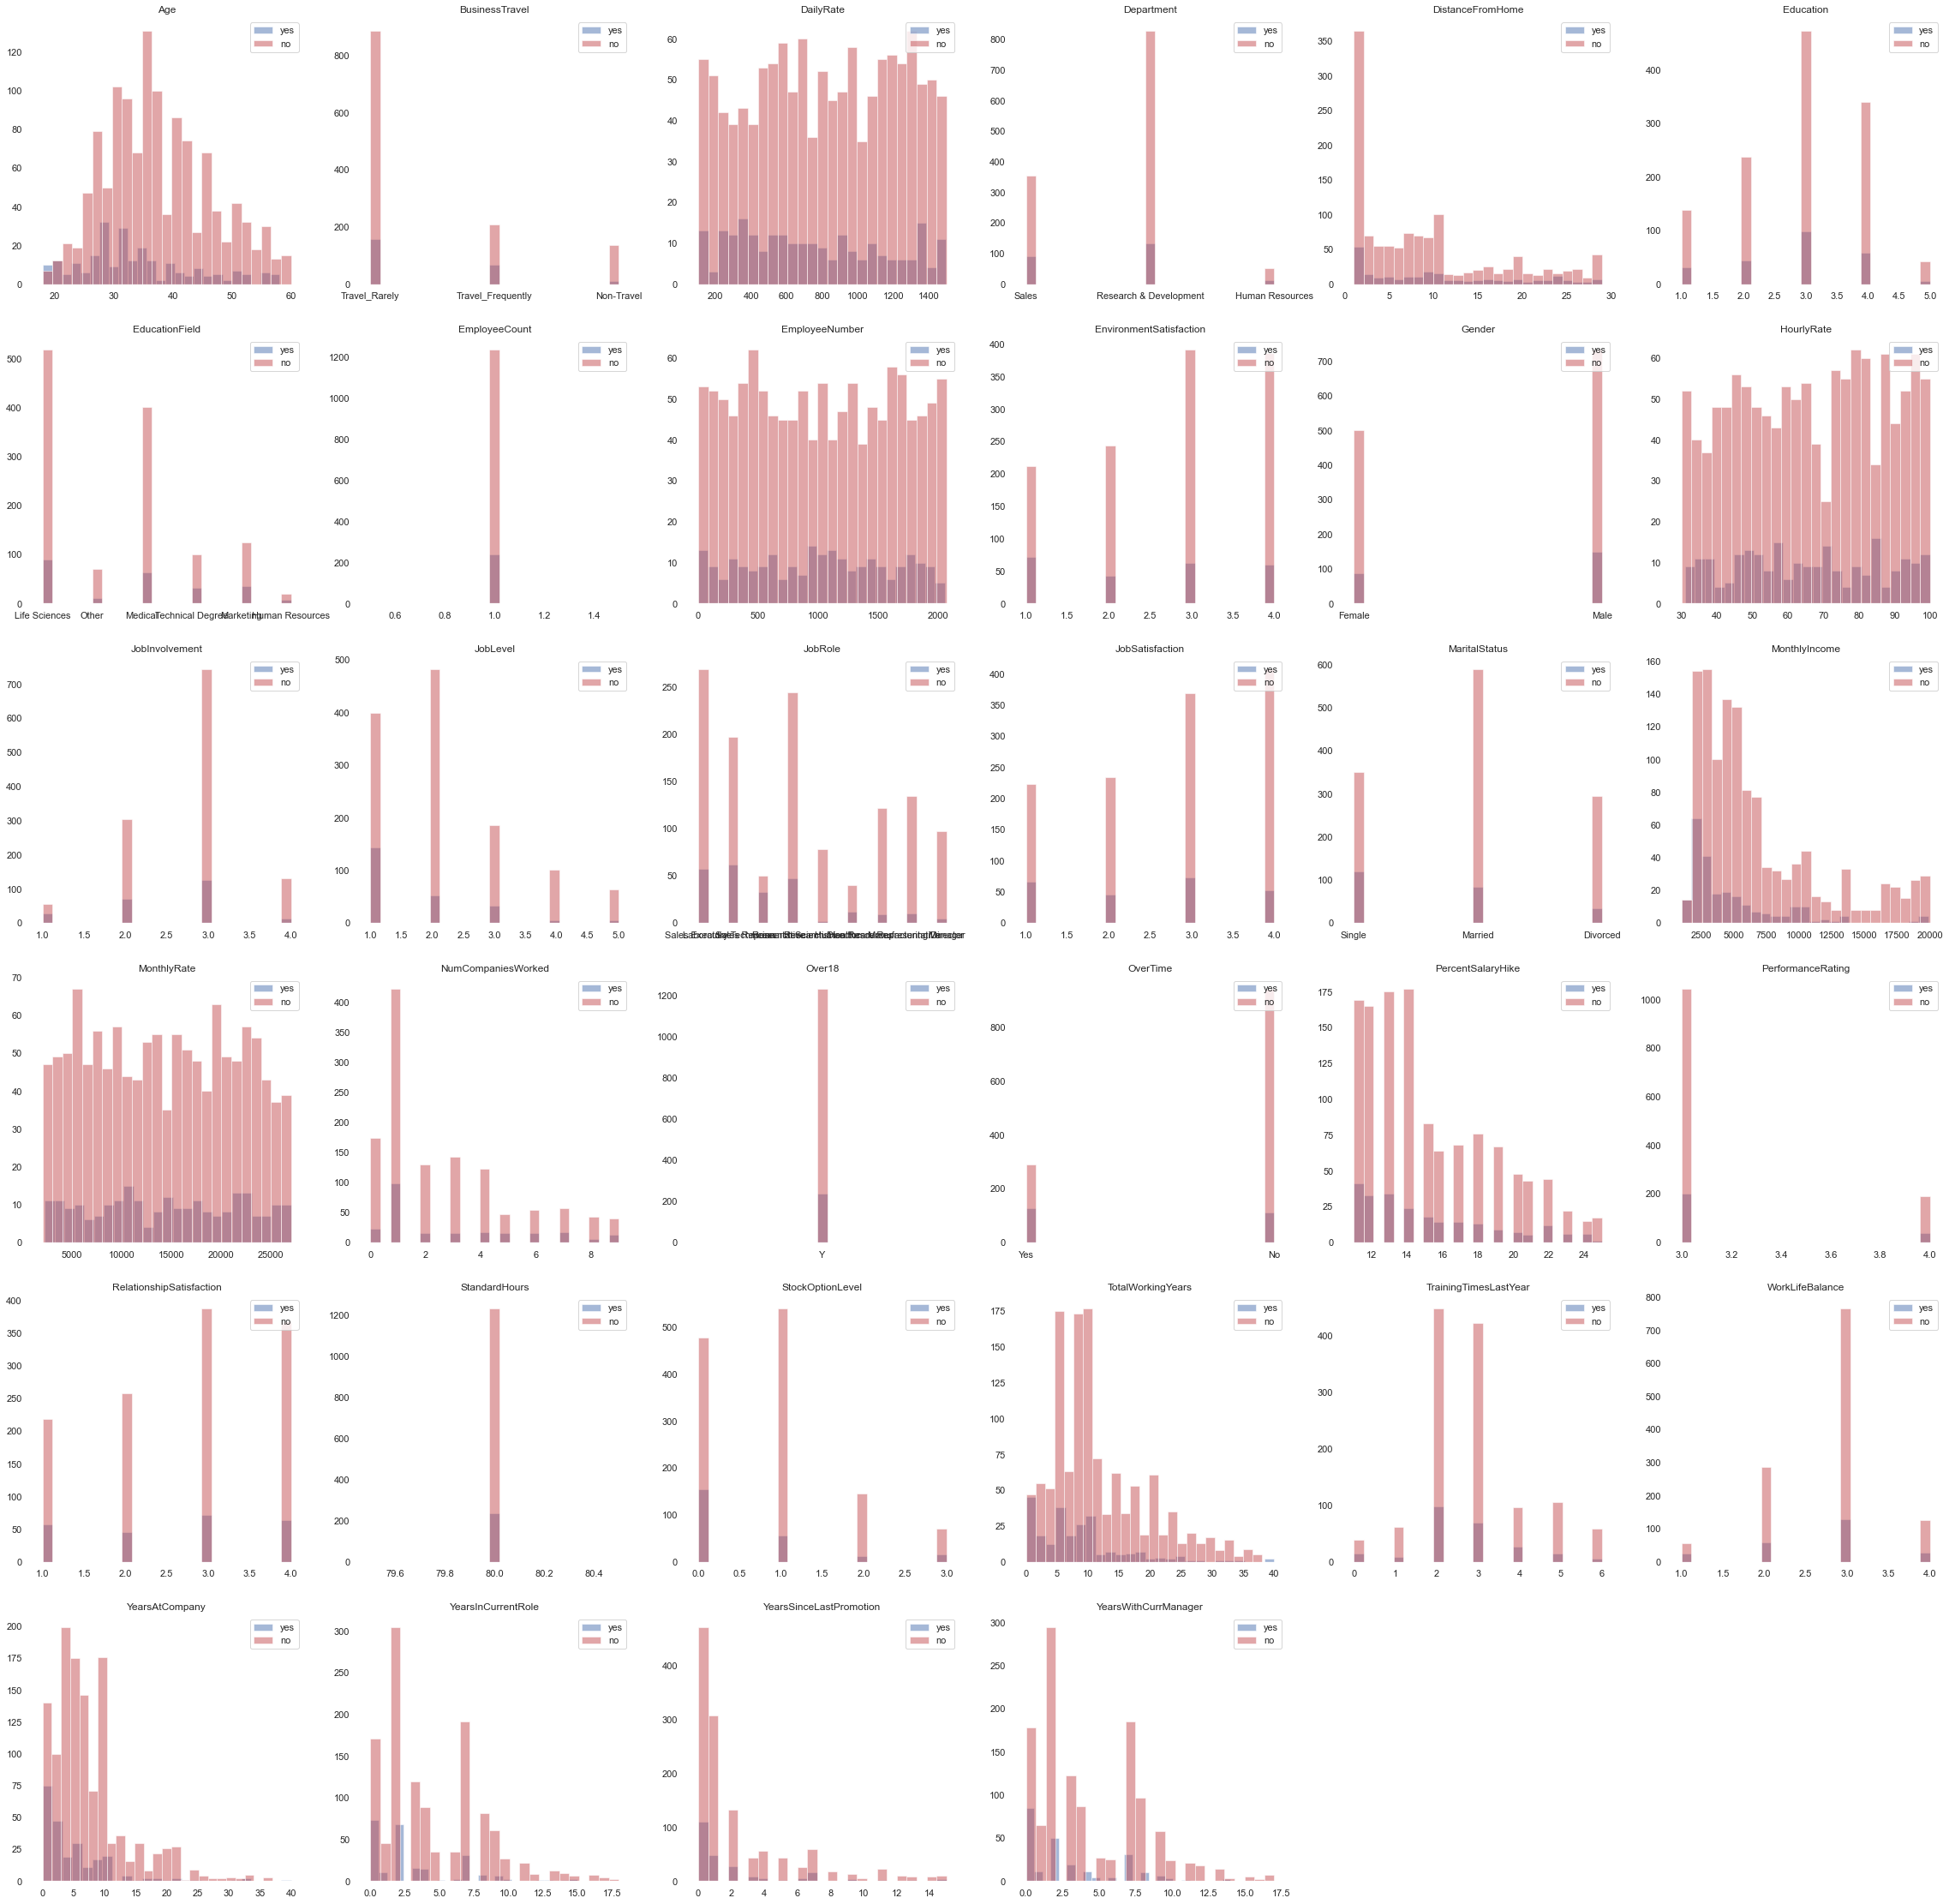

In [28]:
k=1
plt.figure(figsize=(40, 40))
for col in data:
  if col=="Attrition":
    continue
  yes = data[data['Attrition'] == 'Yes'][col]
  no = data[data['Attrition'] == 'No'][col]
  plt.subplot(6, 6, k)
  plt.hist(yes, bins=25, alpha=0.5, label='yes', color='b')
  plt.hist(no, bins=25, alpha=0.5, label='no', color='r')
  plt.legend(loc='upper right')
  plt.title(col)
  k+=1

# chi-square test on categorical data

In [29]:
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [30]:
cat_cols = data.select_dtypes(include="object").columns.tolist()
cat_cols.remove("Attrition")

In [31]:
chi2_statistic = {}
p_values = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(data[col], data['Attrition'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value

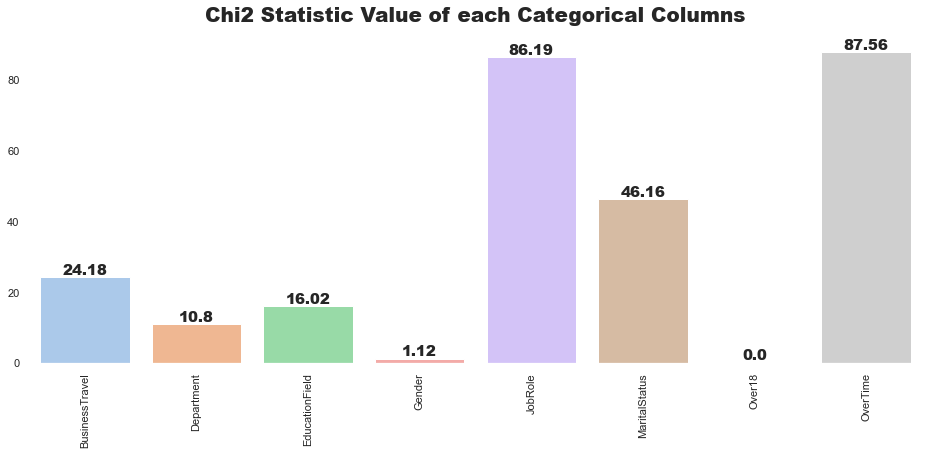

In [32]:
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(16,6))
sns.barplot(x=columns, y=values)
plt.xticks(rotation=90)
plt.title("Chi2 Statistic Value of each Categorical Columns",fontweight="black",size=20,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",fontweight="black",size=15)

plt.show()

In [33]:
test_df = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
test_df["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]

In [34]:
test_df

,Features,Chi_2 Statistic,P_value
0,BusinessTravel,24.182414,0.00000560861447644993
1,Department,10.796007,0.00452560657447963286
2,EducationField,16.024674,0.00677398013902521211
3,Gender,1.116967,0.29057244902890855265
4,JobRole,86.190254,0.00000000000000275248
5,MaritalStatus,46.163677,0.00000000009455511060
6,Over18,0.000000,1.00000000000000000000
7,OverTime,87.564294,0.00000000000000000001


In [35]:
# Filter features with p-value >= 0.05
accepted_features = test_df[test_df["P_value"].astype(float) >= 0.05]["Features"]

# Drop hypothesis-rejected features
test_df = test_df[test_df["P_value"].astype(float) >= 0.05]

# Display accepted features
print("Accepted features:")
print(accepted_features)

# Display modified DataFrame
print("\nModified DataFrame:")
print(test_df)

Accepted features:
3    Gender
6    Over18
Name: Features, dtype: object

Modified DataFrame:
  Features  Chi_2 Statistic                 P_value
3   Gender         1.116967  0.29057244902890855265
6   Over18         0.000000  1.00000000000000000000


In [36]:
num_col_names = data.select_dtypes(include=[np.int64,np.float64]).columns.tolist()
print(num_col_names)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


# correlation matrix

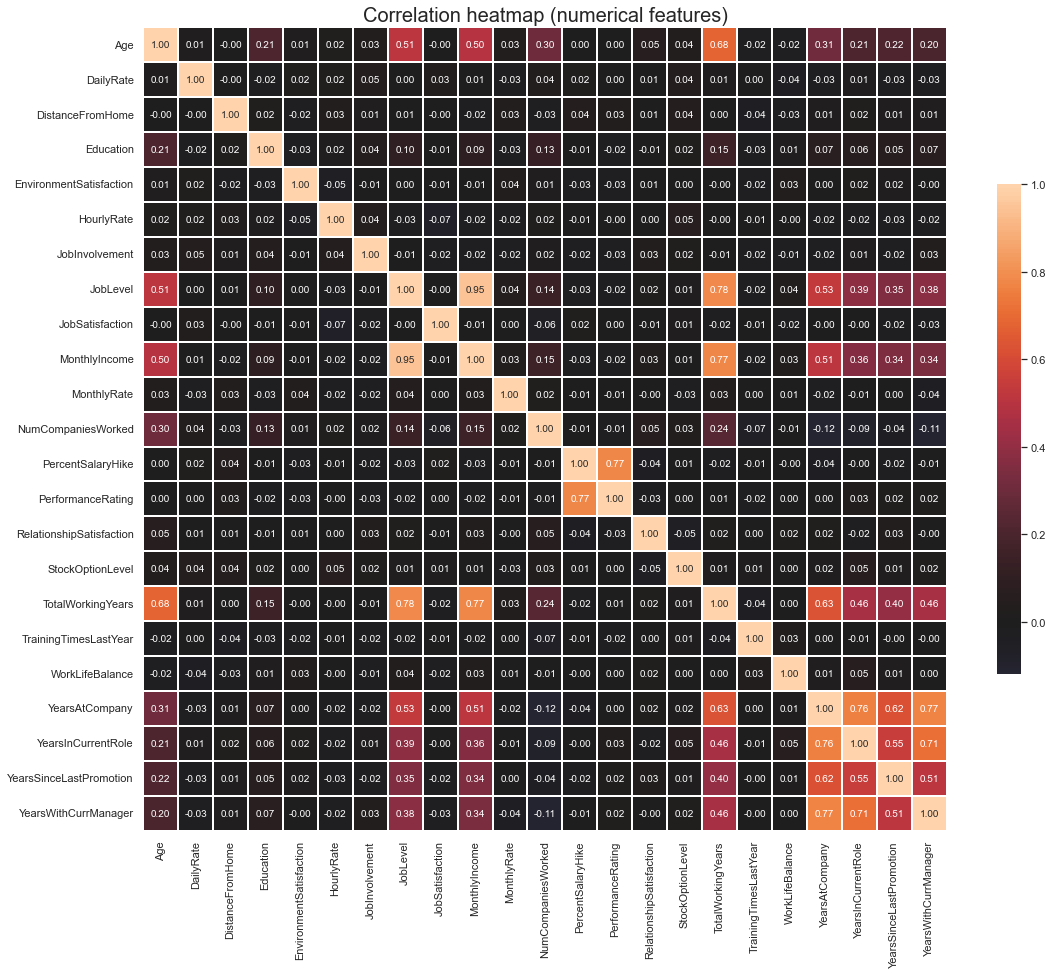

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined 'df' DataFrame
# Drop non-numeric columns before calculating correlation
numeric_data = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr = numeric_data.corr()

# Plot correlation matrix heatmap
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corr, annot=True, linewidths=.1, fmt='.2f', ax=ax,
            center=0, square=True, cbar_kws={'shrink': .5})
plt.title('Correlation heatmap (numerical features)', size=20)
plt.show()


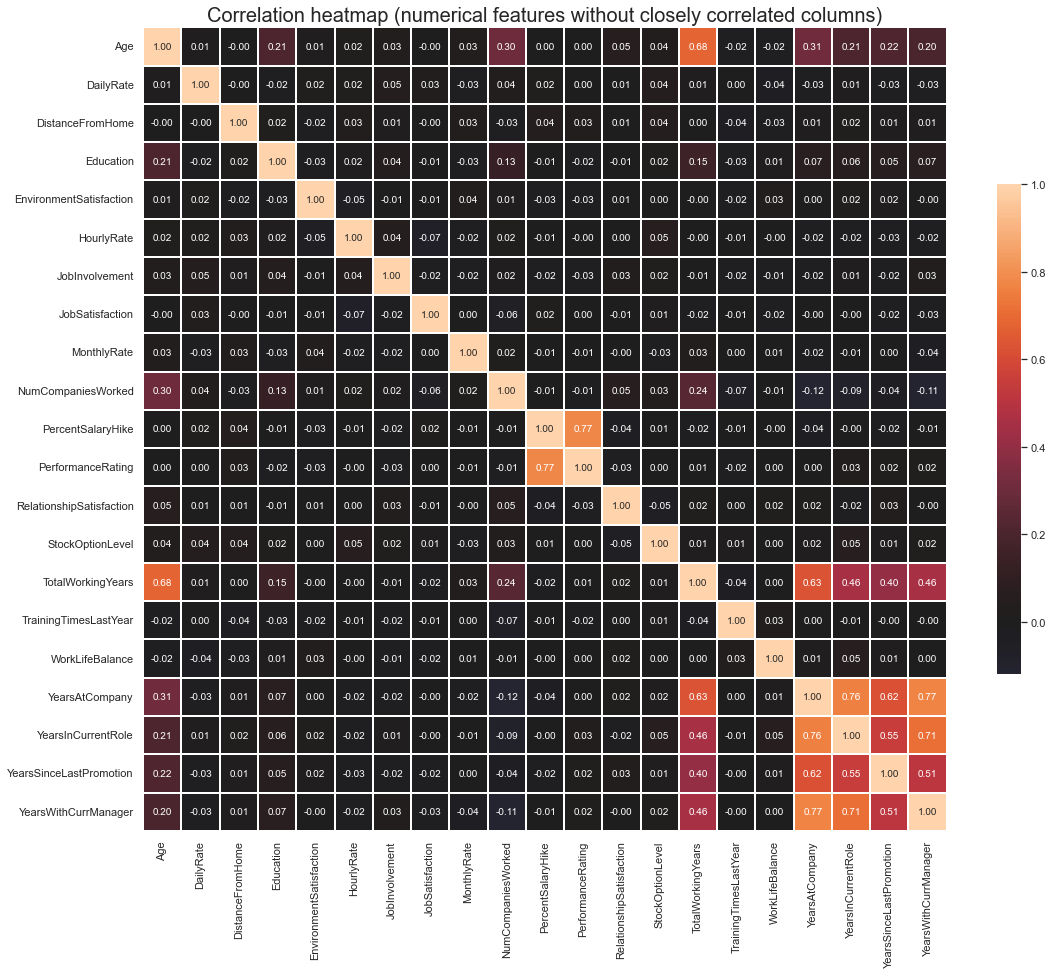

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined 'df' DataFrame
# Drop non-numeric columns before calculating correlation
numeric_data = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr = numeric_data.corr()

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Identify closely correlated columns
closely_correlated = (corr.abs() > 0.8) & (corr.abs() < 1)

# Iterate through the columns and drop one of the columns if they are closely correlated
columns_to_drop = set()
for col in closely_correlated:
    correlated_cols = closely_correlated[col][closely_correlated[col]].index.tolist()
    for correlated_col in correlated_cols:
        if correlated_col not in columns_to_drop:
            columns_to_drop.add(correlated_col)

# Drop the closely correlated columns from the dataframe
numeric_data_filtered = numeric_data.drop(columns=columns_to_drop)

# Recalculate correlation matrix
corr_filtered = numeric_data_filtered.corr()

# Plot correlation matrix heatmap
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corr_filtered, annot=True, linewidths=.1, fmt='.2f', ax=ax,
            center=0, square=True, cbar_kws={'shrink': .5})
plt.title('Correlation heatmap (numerical features without closely correlated columns)', size=20)
plt.show()


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#254E58;overflow:hidden"><b> Machine Learning Models </b></div>

In [39]:
DF = df.copy()

In [40]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode 'BusinessTravel' column
DF['BusinessTravel'] = label_encoder.fit_transform(DF['BusinessTravel'])

# Encode 'Attrition' column
DF['Attrition'] = label_encoder.fit_transform(DF['Attrition'])

# Encode 'OverTime' column
DF['OverTime'] = label_encoder.fit_transform(DF['OverTime'])

# Encode 'Gender' column
DF['Gender'] = label_encoder.fit_transform(DF['Gender'])

# Encode 'MaritalStatus' column
DF['MaritalStatus'] = label_encoder.fit_transform(DF['MaritalStatus'])

# Encode 'Department' column
DF['Department'] = label_encoder.fit_transform(DF['Department'])

# Encode 'EducationField' column
DF['EducationField'] = label_encoder.fit_transform(DF['EducationField'])

# Encode 'JobRole' column
DF['JobRole'] = label_encoder.fit_transform(DF['JobRole'])


In [41]:
DF = DF.drop(['MonthlyIncome' ,'YearsInCurrentRole' , 'YearsAtCompany', 'YearsWithCurrManager'],axis=1)

In [42]:
#normalizing
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
DF1 = DF.drop(columns=['Attrition'])
norm = scaler.fit_transform(DF)
norm_df = pd.DataFrame(norm,columns=DF.columns)

In [43]:
X = pd.DataFrame(norm_df.drop(columns='Attrition'))
Y = pd.DataFrame(norm_df.Attrition).values.reshape(-1, 1)

In [44]:
x_train  , x_test , y_train, y_test = train_test_split (X ,Y ,test_size = 0.2 , random_state = 0)

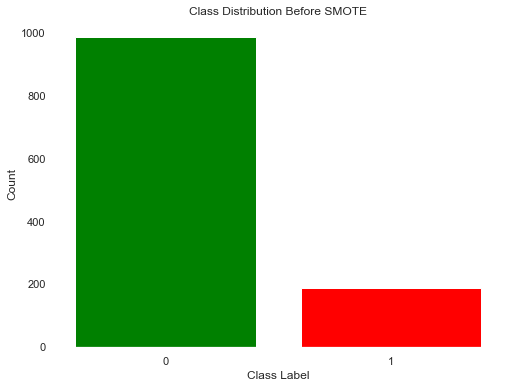

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_train is a numpy array
unique_values, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(8, 6))
plt.bar(unique_values, counts, color=['green', 'red'])
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Distribution Before SMOTE')
plt.xticks(unique_values)  # Ensures all class labels are displayed on the x-axis
plt.show()


In [46]:
import numpy as np

# Assuming y_train is a numpy array
unique_values, counts = np.unique(y_train, return_counts=True)

# Display the counts
for label, count in zip(unique_values, counts):
    print(f"Class {label}: {count}")


Class 0.0: 988
Class 1.0: 188


In [47]:
#SMOTE
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(x_train,y_train)


# smote

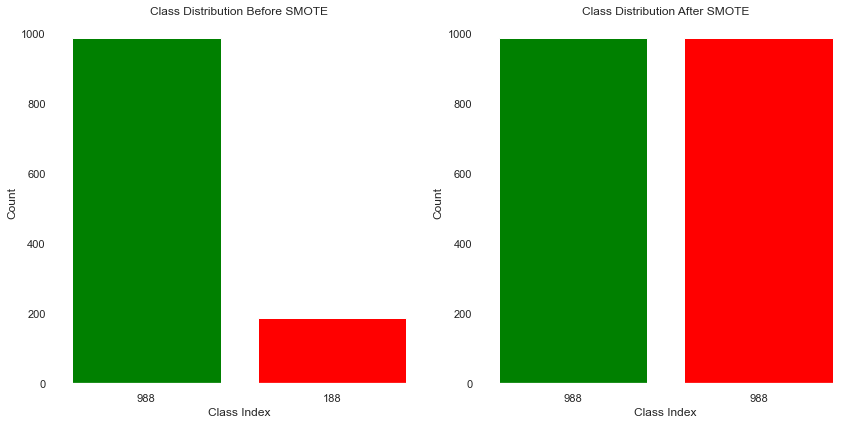

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming smote_target is a numpy array
unique_values_smote, counts_smote = np.unique(smote_target, return_counts=True)

plt.figure(figsize=(12, 6))

# Plotting class distribution before SMOTE
plt.subplot(1, 2, 1)
plt.bar(range(len(counts)), counts, color=['green', 'red'])
plt.xlabel('Class Index')
plt.ylabel('Count')
plt.title('Class Distribution Before SMOTE')
plt.xticks(range(len(counts)), counts)  # Set the xticks to display only the counts

# Plotting class distribution after SMOTE
plt.subplot(1, 2, 2)
plt.bar(range(len(counts_smote)), counts_smote, color=['green', 'red'])
plt.xlabel('Class Index')
plt.ylabel('Count')
plt.title('Class Distribution After SMOTE')
plt.xticks(range(len(counts_smote)), counts_smote)  # Set the xticks to display only the counts

plt.tight_layout()
plt.show()


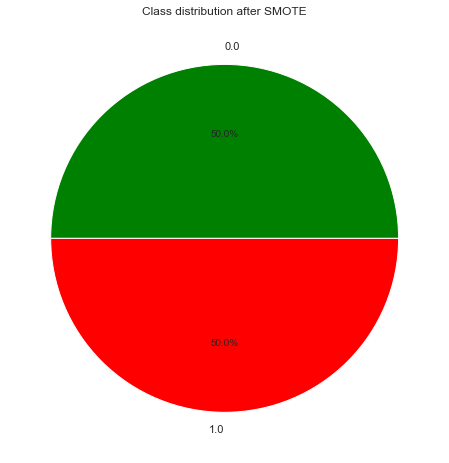

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming smote_target is a numpy array
unique_values, counts = np.unique(smote_target, return_counts=True)

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=unique_values, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Class distribution after SMOTE')
plt.show()


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (1176, 26) (1176, 1)
Test set: (294, 26) (294, 1)


In [51]:
Training_Accuracy_L=[]
Test_Accuracy_L=[]
Sensitivity_L=[]
Specificity_L=[]
F1Score_L=[]
Precision_L=[]
Negative_Predictive_Value_L=[]
False_Negative_Rate_L=[]
False_Positive_Rate_L=[]
False_Discovery_Rate_L=[]
False_Omission_Rate_L=[]
cv_accuracy_L=[]

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import make_scorer, roc_auc_score, confusion_matrix, accuracy_score, roc_curve,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold

In [53]:
import math


def rounder(n):
  try:
    return math.ceil(n * 1000) / 1000
  except:
    return n

def fun(model,name,num_folds):
  test_pred = model.predict(X_test)
  train_pred = model.predict(X_train)

  train_acc=rounder(accuracy_score(y_train,train_pred)*100)
  test_acc=rounder(accuracy_score(y_test,test_pred)*100)

  Training_Accuracy_L.append(train_acc)
  Test_Accuracy_L.append(test_acc)

  print("\nTraining Accuracy:", train_acc)
  print("\nTesting Accuracy:",test_acc)

  print(classification_report(y_test,test_pred))
  test_conf_matrix = confusion_matrix(y_test,test_pred)
  plt.figure(figsize=(4, 4))
  sns.heatmap(test_conf_matrix, annot=True, fmt='g', cmap='Greens', cbar=False)
  t=name+' Confusion Matrix - Test Set'
  plt.title(t)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

  tn, fp,fn,tp = test_conf_matrix.ravel()

  Sensitivity=rounder((tp) / (tp + fn))
  Sensitivity_L.append(Sensitivity)

  Specificity=rounder((tn) / (tn + fp))
  Specificity_L.append(Specificity)

  F1Score=rounder( (2 * tp) / (2 * tp+ fp + fn))
  F1Score_L.append(F1Score)

  Precision=rounder((tp) / (tp +fp))
  Precision_L.append(Precision)

  Negative_Predictive_Value= rounder((tn) / (tn + fn))
  Negative_Predictive_Value_L.append(Negative_Predictive_Value)

  False_Negative_Rate=rounder((fn) / (fn + tp))
  False_Negative_Rate_L.append(False_Negative_Rate)

  False_Positive_Rate=rounder((fp) / (fp + tn))
  False_Positive_Rate_L.append(False_Positive_Rate)

  False_Discovery_Rate=rounder((fp) / (fp + tp))
  False_Discovery_Rate_L.append(False_Discovery_Rate)

  False_Omission_Rate=rounder((fn) / (fn+ tn))
  False_Omission_Rate_L.append(False_Omission_Rate)


  print('Sensitivity:', Sensitivity)
  print('Specificity:', Specificity)
  print('F1 Score:', F1Score)
  print('Precision:',Precision)
  print('Negative Predictive Value:', Negative_Predictive_Value)
  print('False Negative Rate:',False_Negative_Rate)
  print('False Positive Rate:',False_Positive_Rate)
  print('False Discovery Rate:',False_Discovery_Rate)
  print('False Omission Rate:', False_Omission_Rate)

  test_probabilities =model.predict_proba(X_test)[:, 1]
  auc_score = roc_auc_score(y_test,test_probabilities)

  fpr, tpr, thresholds = roc_curve(y_test, test_probabilities)
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, label=''+name+'(AUC = {:.2f})'.format(auc_score))
  plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve - '+name)
  plt.legend()
  plt.show()

  kf = KFold(n_splits=num_folds, shuffle=True,random_state=42)
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
  print(f"\n{num_folds}-Fold Cross-Validation Scores:")
  print(cv_scores)

  print(f"\nCross-Validation Accuracy Score: {max(cv_scores) * 100:.2f}%")
  cv_accuracy_L.append(max(cv_scores)*100)


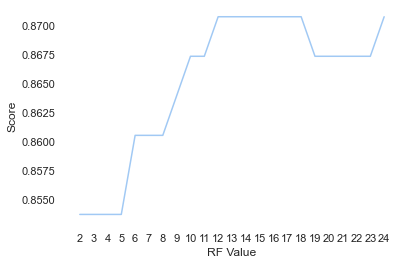

Random Forest Accuracy:  87.07%

Training Accuracy: 87.586

Testing Accuracy: 87.075
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       251
         1.0       0.86      0.14      0.24        43

    accuracy                           0.87       294
   macro avg       0.86      0.57      0.58       294
weighted avg       0.87      0.87      0.83       294



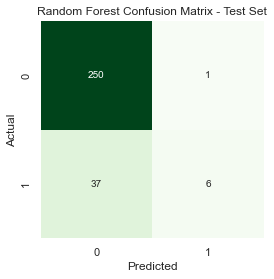

Sensitivity: 0.14
Specificity: 0.997
F1 Score: 0.24
Precision: 0.858
Negative Predictive Value: 0.872
False Negative Rate: 0.861
False Positive Rate: 0.004
False Discovery Rate: 0.143
False Omission Rate: 0.129


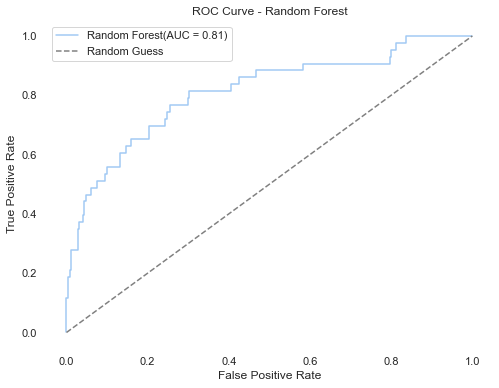


16-Fold Cross-Validation Scores:
[0.83783784 0.77027027 0.86486486 0.87837838 0.85135135 0.91891892
 0.78378378 0.86486486 0.89041096 0.87671233 0.79452055 0.80821918
 0.71232877 0.8630137  0.89041096 0.8630137 ]

Cross-Validation Accuracy Score: 91.89%


In [54]:
import matplotlib.pyplot as plt
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))
fun(RFclassifier,'Random Forest',16)

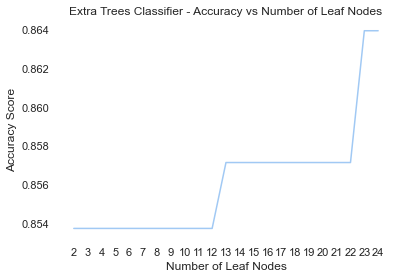

Extra Trees Classifier Accuracy: 86.39%

Training Accuracy: 85.375

Testing Accuracy: 86.395
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93       251
         1.0       1.00      0.07      0.13        43

    accuracy                           0.86       294
   macro avg       0.93      0.53      0.53       294
weighted avg       0.88      0.86      0.81       294



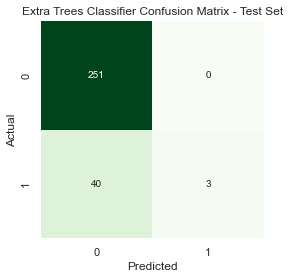

Sensitivity: 0.07
Specificity: 1.0
F1 Score: 0.131
Precision: 1.0
Negative Predictive Value: 0.863
False Negative Rate: 0.931
False Positive Rate: 0.0
False Discovery Rate: 0.0
False Omission Rate: 0.138


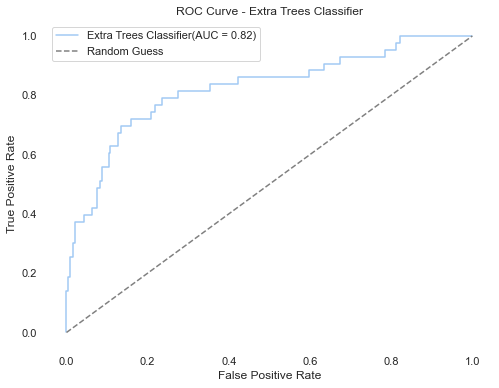


6-Fold Cross-Validation Scores:
[0.80102041 0.85204082 0.84183673 0.85714286 0.79081633 0.87244898]

Cross-Validation Accuracy Score: 87.24%


In [55]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
scoreListET=[]
for i in range(2, 25):
    ETclassifier = ExtraTreesClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=i)
    ETclassifier.fit(X_train, y_train)
    scoreListET.append(ETclassifier.score(X_test, y_test))

plt.plot(range(2, 25), scoreListET)
plt.xticks(np.arange(2, 25, 1))
plt.xlabel("Number of Leaf Nodes")
plt.ylabel("Accuracy Score")
plt.title("Extra Trees Classifier - Accuracy vs Number of Leaf Nodes")
plt.show()

ETAcc = max(scoreListET)
print("Extra Trees Classifier Accuracy: {:.2f}%".format(ETAcc * 100))
fun(ETclassifier,'Extra Trees Classifier',6)

LR accuracy: 89.12%


Training Accuracy: 86.055

Testing Accuracy: 89.116
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       251
         1.0       0.74      0.40      0.52        43

    accuracy                           0.89       294
   macro avg       0.82      0.69      0.73       294
weighted avg       0.88      0.89      0.88       294



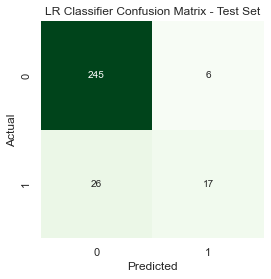

Sensitivity: 0.396
Specificity: 0.977
F1 Score: 0.516
Precision: 0.74
Negative Predictive Value: 0.905
False Negative Rate: 0.605
False Positive Rate: 0.024
False Discovery Rate: 0.261
False Omission Rate: 0.096


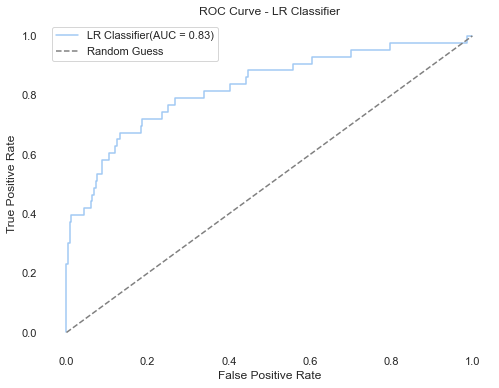


5-Fold Cross-Validation Scores:
[0.81779661 0.88085106 0.87659574 0.82553191 0.87234043]

Cross-Validation Accuracy Score: 88.09%


In [56]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%\n'.format(LRAcc*100))
fun(LRclassifier,'LR Classifier',5)

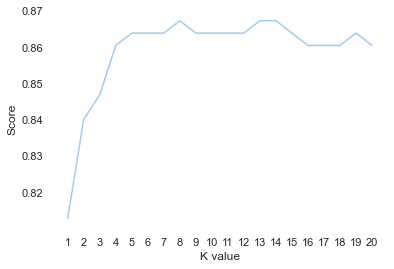

KNN best accuracy: 86.73%

Training Accuracy: 84.099

Testing Accuracy: 86.055
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92       251
         1.0       1.00      0.05      0.09        43

    accuracy                           0.86       294
   macro avg       0.93      0.52      0.51       294
weighted avg       0.88      0.86      0.80       294



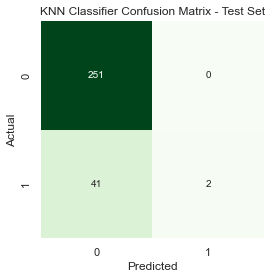

Sensitivity: 0.047
Specificity: 1.0
F1 Score: 0.089
Precision: 1.0
Negative Predictive Value: 0.86
False Negative Rate: 0.954
False Positive Rate: 0.0
False Discovery Rate: 0.0
False Omission Rate: 0.141


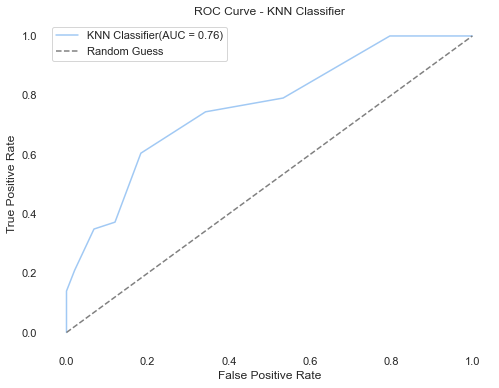


8-Fold Cross-Validation Scores:
[0.79591837 0.85714286 0.88435374 0.80272109 0.8707483  0.80952381
 0.81632653 0.87755102]

Cross-Validation Accuracy Score: 88.44%


In [57]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))

plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))
fun(KNclassifier,'KNN Classifier',8)

In [58]:
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):


    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.81292517, 0.84013605, 0.84693878, 0.86054422, 0.86394558,
       0.86394558, 0.86394558, 0.86734694, 0.86394558])

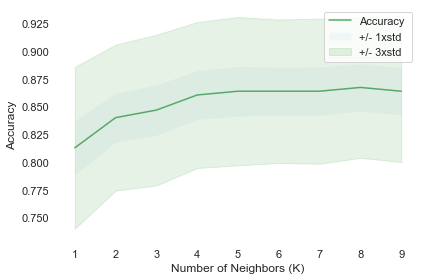

In [59]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [60]:
print( "The best accuracy was with", mean_acc.max(), "which was K=", mean_acc.argmax()+1)

The best accuracy was with 0.8673469387755102 which was K= 8


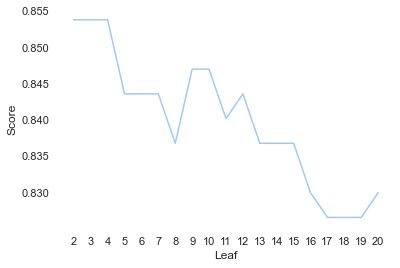

Decision Tree Accuracy: 85.37%

Training Accuracy: 88.946

Testing Accuracy: 82.994
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90       251
         1.0       0.38      0.26      0.31        43

    accuracy                           0.83       294
   macro avg       0.63      0.59      0.60       294
weighted avg       0.81      0.83      0.82       294



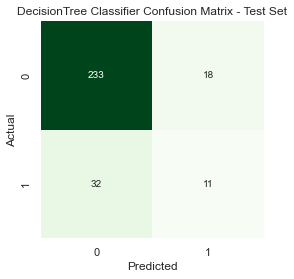

Sensitivity: 0.256
Specificity: 0.929
F1 Score: 0.306
Precision: 0.38
Negative Predictive Value: 0.88
False Negative Rate: 0.745
False Positive Rate: 0.072
False Discovery Rate: 0.621
False Omission Rate: 0.121


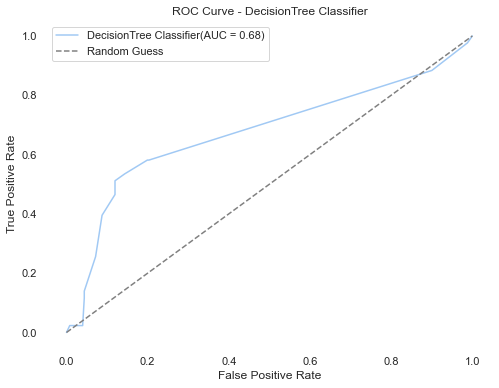


11-Fold Cross-Validation Scores:
[0.85981308 0.73831776 0.87850467 0.81308411 0.82242991 0.82242991
 0.86915888 0.78504673 0.76635514 0.8411215  0.86792453]

Cross-Validation Accuracy Score: 87.85%


In [61]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))

plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))
fun(DTclassifier,'DecisionTree Classifier',11)

Gradient Boosting accuracy: 86.73%

Training Accuracy: 100.0

Testing Accuracy: 86.735
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92       251
         1.0       0.57      0.37      0.45        43

    accuracy                           0.87       294
   macro avg       0.73      0.66      0.69       294
weighted avg       0.85      0.87      0.86       294



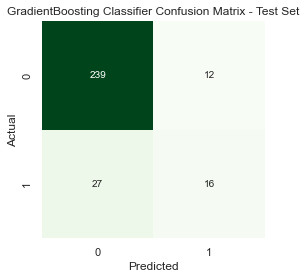

Sensitivity: 0.373
Specificity: 0.953
F1 Score: 0.451
Precision: 0.572
Negative Predictive Value: 0.899
False Negative Rate: 0.628
False Positive Rate: 0.048
False Discovery Rate: 0.429
False Omission Rate: 0.102


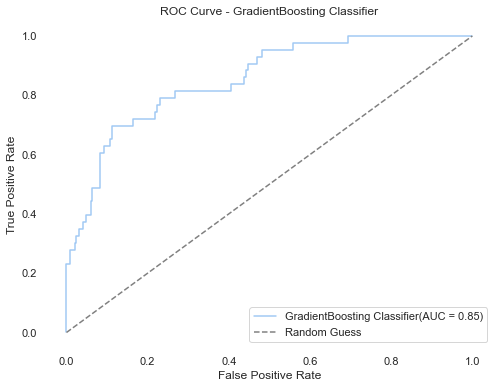


3-Fold Cross-Validation Scores:
[0.8622449  0.88010204 0.85459184]

Cross-Validation Accuracy Score: 88.01%


In [62]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, y_train)
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))
fun(GBclassifier,'GradientBoosting Classifier',3)

XGBoost accuracy: 90.14%

Training Accuracy: 90.052

Testing Accuracy: 90.137
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94       251
         1.0       0.79      0.44      0.57        43

    accuracy                           0.90       294
   macro avg       0.85      0.71      0.76       294
weighted avg       0.89      0.90      0.89       294



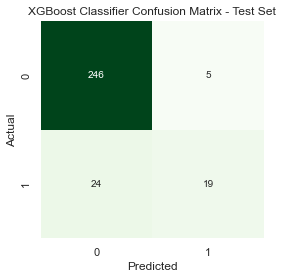

Sensitivity: 0.442
Specificity: 0.981
F1 Score: 0.568
Precision: 0.792
Negative Predictive Value: 0.912
False Negative Rate: 0.559
False Positive Rate: 0.02
False Discovery Rate: 0.209
False Omission Rate: 0.089


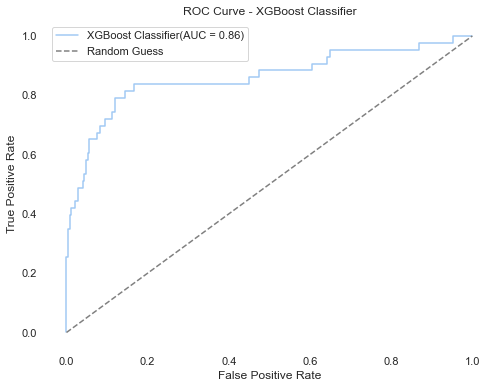


3-Fold Cross-Validation Scores:
[0.88010204 0.875      0.8622449 ]

Cross-Validation Accuracy Score: 88.01%


In [63]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Define the parameters grid for XGBoost
params_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [1, 2, 3, 4, 5],
    'subsample': [0.5, 1],
    'colsample_bytree': [0.5, 1],
}

# Initialize RandomizedSearchCV for XGBoost
xgb_classifier = xgb.XGBClassifier()
xgb_random_search = RandomizedSearchCV(xgb_classifier, params_xgb, cv=20)

# Perform RandomizedSearchCV
xgb_random_search.fit(X_train, y_train)

# Get the best estimator from RandomizedSearchCV
best_xgb_classifier = xgb_random_search.best_estimator_

# Train the best XGBoost classifier
best_xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = best_xgb_classifier.predict(X_test)

# Calculate accuracy
xgb_acc = accuracy_score(y_test, y_pred_xgb)
print('XGBoost accuracy: {:.2f}%'.format(xgb_acc * 100))

# You can define your function fun to display evaluation metrics
fun(best_xgb_classifier, 'XGBoost Classifier', 3)


In [64]:
import pandas as pd
compare = pd.DataFrame({'Model': ['Random Forest','Extra Trees Classifier','Logistic Regression', 'K Neighbors', 'Decision Tree',
                                   'Gradient Boost', 'XG Boost'],
                        'Accuracy': [RFAcc*100,ETAcc*100,LRAcc*100, KNAcc*100,
                                     DTAcc*100,  GBAcc*100, xgb_acc*100],
                        'Training Accuracy':Training_Accuracy_L,
                        'Test Accuracy':Test_Accuracy_L,
                        'Sensitivity':Sensitivity_L,
                        'Specificity':Specificity_L,
                        'F1 Score':F1Score_L,
                        'Precision':Precision_L,
                        'Negative Predictive Value':Negative_Predictive_Value_L,
                        'False Negative Rate':False_Negative_Rate_L,
                        'False Positive Rate':False_Positive_Rate_L,
                        'False Discovery Rate':False_Discovery_Rate_L,
                        'False Omission Rate':False_Omission_Rate_L,
                        'cv-accuracy score':cv_accuracy_L,
                        })
compare.sort_values(by='Accuracy', ascending=False)


,Model,Accuracy,Training Accuracy,Test Accuracy,Sensitivity,Specificity,F1 Score,Precision,Negative Predictive Value,False Negative Rate,False Positive Rate,False Discovery Rate,False Omission Rate,cv-accuracy score
6,XG Boost,90.136054,90.052,90.137,0.442,0.981,0.568,0.792,0.912,0.559,0.020,0.209,0.089,88.010204
2,Logistic Regression,89.115646,86.055,89.116,0.396,0.977,0.516,0.740,0.905,0.605,0.024,0.261,0.096,88.085106
0,Random Forest,87.074830,87.586,87.075,0.140,0.997,0.240,0.858,0.872,0.861,0.004,0.143,0.129,91.891892
3,K Neighbors,86.734694,84.099,86.055,0.047,1.000,0.089,1.000,0.860,0.954,0.000,0.000,0.141,88.435374
5,Gradient Boost,86.734694,100.000,86.735,0.373,0.953,0.451,0.572,0.899,0.628,0.048,0.429,0.102,88.010204
1,Extra Trees Classifier,86.394558,85.375,86.395,0.070,1.000,0.131,1.000,0.863,0.931,0.000,0.000,0.138,87.244898
4,Decision Tree,85.374150,88.946,82.994,0.256,0.929,0.306,0.380,0.880,0.745,0.072,0.621,0.121,87.850467


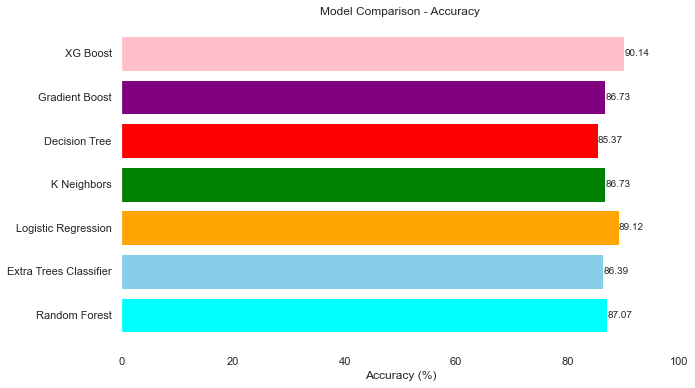

In [65]:
import matplotlib.pyplot as plt
colors = ['aqua','skyblue', 'orange', 'green', 'red', 'purple', 'pink']
plt.figure(figsize=(10, 6))
plt.barh(compare['Model'], compare['Accuracy'], color=colors)
plt.xlabel('Accuracy (%)')
plt.title('Model Comparison - Accuracy')
plt.xlim(0, 100)
for index, value in enumerate(compare['Accuracy']):
    plt.text(value, index, f'{value:.2f}', va='center', fontsize=10)

plt.show()